Project Goal :
This notebook explores the structure of the job market dataset
to understand the distribution of roles, companies, locations,
and job benefits in the data industry.

Questions to Explore :
  What are the most common data  roles?                                                      
  Which countries post the most data jobs?                                                
  Which companies are hiring the most?                                                   
  What benefits are commonly offered?             

In [ ]:
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset


In [ ]:
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df.head()


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

data_jobs.csv:   0%|          | 0.00/231M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/785741 [00:00<?, ? examples/s]

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


In [ ]:
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df['job_skills'] = df['job_skills'].apply(
    lambda x: ast.literal_eval(x) if pd.notna(x) else x
)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

/tmp/ipython-input-2896791820.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_plot, x='count', y='job_title_short', palette='dark:b_r')


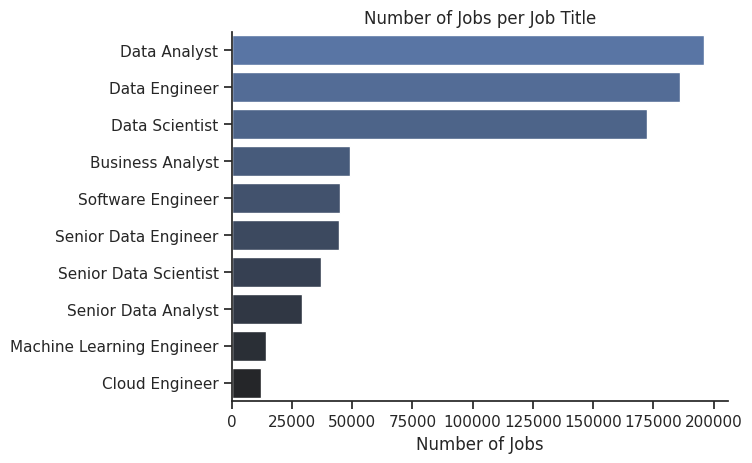

In [ ]:
df_plot = df['job_title_short'].value_counts().to_frame().reset_index()
df_plot.columns = ['job_title_short', 'count']

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_title_short', palette='dark:b_r')

sns.despine()
plt.title('Number of Jobs per Job Title')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()


/tmp/ipython-input-991970111.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_plot, x='count', y='job_country', palette='dark:b_r')


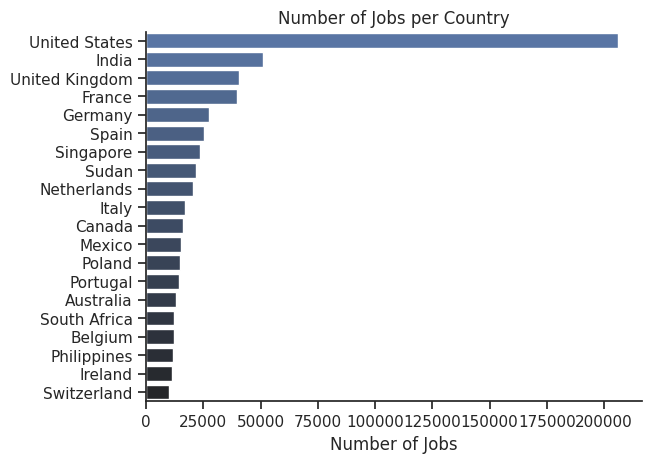

In [ ]:
df_plot = df['job_country'].value_counts().head(20).to_frame().reset_index()
df_plot.columns = ['job_country', 'count']

sns.barplot(data=df_plot, x='count', y='job_country', palette='dark:b_r')

sns.despine()
plt.title('Number of Jobs per Country')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()


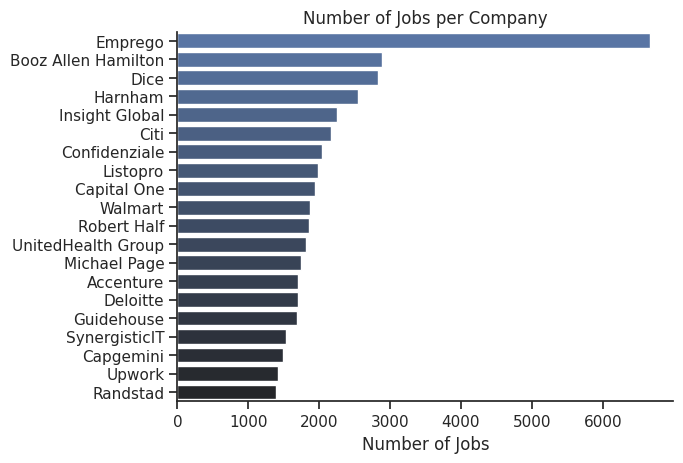

In [ ]:
df_plot = df['company_name'].value_counts().head(20).to_frame().reset_index()
df_plot.columns = ['company_name', 'count']

sns.barplot(
    data=df_plot,
    x='count',
    y='company_name',
    hue='company_name',
    palette='dark:b_r',
    legend=False
)

sns.despine()
plt.title('Number of Jobs per Company')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()


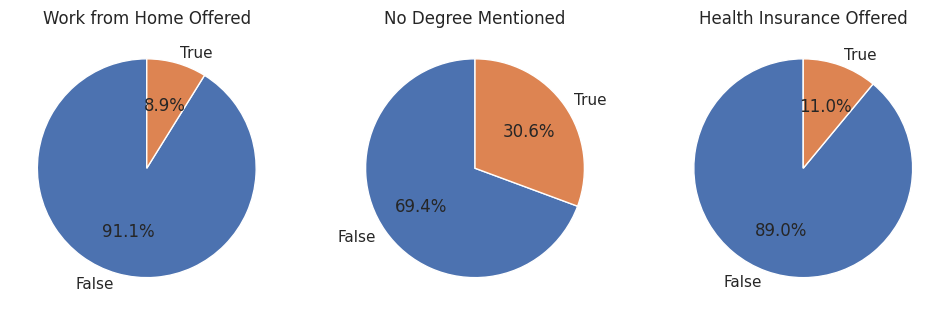

In [ ]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'No Degree Mentioned',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3, figsize=(12, 4))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(
        df[column].value_counts(),
        labels=['False', 'True'],
        autopct='%1.1f%%',
        startangle=90
    )
    ax[i].set_title(title)

plt.show()


In [ ]:
df_DA_US = df[
    (df['job_country'] == 'United States') &
    (df['job_title_short'] == 'Data Analyst')
]

df_DA_US.shape


(67816, 17)

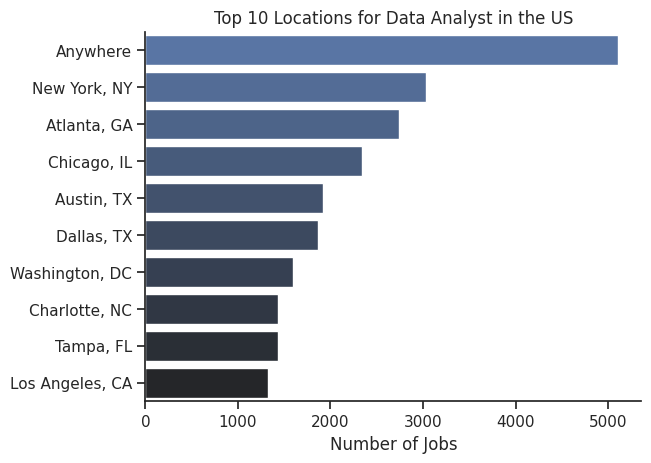

In [ ]:
df_plot = (
    df_DA_US['job_location']
    .value_counts()
    .head(10)
    .to_frame()
    .reset_index()
)

df_plot.columns = ['job_location', 'count']

sns.barplot(
    data=df_plot,
    x='count',
    y='job_location',
    hue='job_location',
    palette='dark:b_r',
    legend=False
)

sns.despine()
plt.title('Top 10 Locations for Data Analyst in the US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()


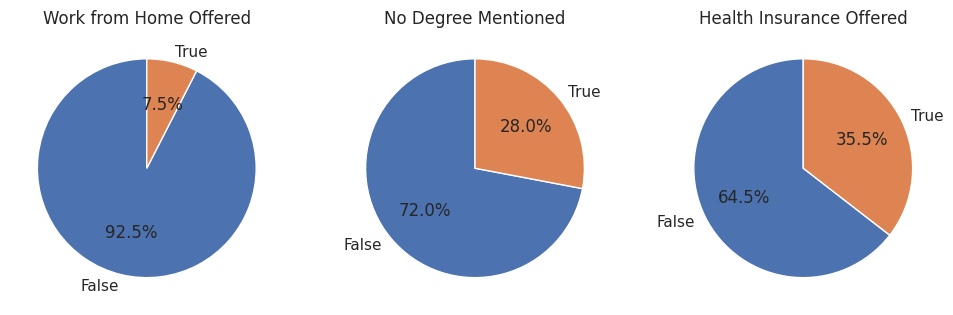

In [ ]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'No Degree Mentioned',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3, figsize=(12, 4))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(
        df_DA_US[column].value_counts(),
        labels=['False', 'True'],
        autopct='%1.1f%%',
        startangle=90
    )
    ax[i].set_title(title)

plt.show()


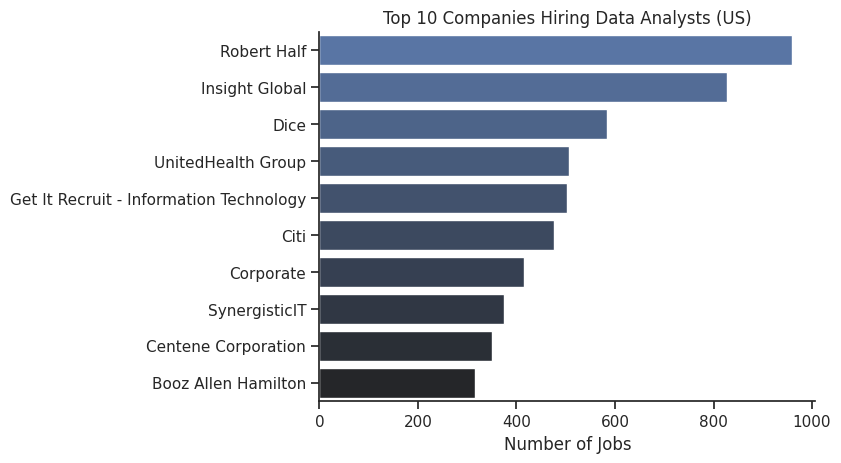

In [ ]:
df_plot = (
    df_DA_US['company_name']
    .value_counts()
    .head(10)
    .to_frame()
    .reset_index()
)

df_plot.columns = ['company_name', 'count']

sns.barplot(
    data=df_plot,
    x='count',
    y='company_name',
    hue='company_name',
    palette='dark:b_r',
    legend=False
)

sns.despine()
plt.title('Top 10 Companies Hiring Data Analysts (US)')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()
